In [ ]:
### Financial Econometrics 
# Assignment 1

In [2]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Problem 1

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import os
import seaborn as sns
from datetime import timedelta, datetime
from statsmodels.tsa.stattools import adfuller #ADF test
from statsmodels.tsa.stattools import kpss #kpss test
from statsmodels.graphics import tsaplots #ACF PACF
from pmdarima.arima import auto_arima

In [4]:
os.getcwd()

'C:\\Users\\benja\\Documents\\Studium\\Nova\\2021 - 2021 SS\\Financial Econometrics\\Assignment_1\\Assignment_1'

In [5]:
df = pd.read_csv("owid-covid-data_CSV.csv", delimiter = ";" )

In [6]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,24.02.2020,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,25.02.2020,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,26.02.2020,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,27.02.2020,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,28.02.2020,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68101,ZWE,Africa,Zimbabwe,06.02.2021,34487.0,156.0,173.429,1316.0,13.0,17.571,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
68102,ZWE,Africa,Zimbabwe,07.02.2021,34552.0,65.0,166.286,1326.0,10.0,15.571,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
68103,ZWE,Africa,Zimbabwe,08.02.2021,34658.0,106.0,158.571,1339.0,13.0,15.000,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
68104,ZWE,Africa,Zimbabwe,09.02.2021,34781.0,123.0,138.143,1353.0,14.0,14.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


In [7]:
df_port = df[df["location"] == "Portugal"].fillna(0)
df_port["date"] = pd.to_datetime(df_port["date"], format = "%d.%m.%Y")
#df_port.to_csv("Portugal.csv")

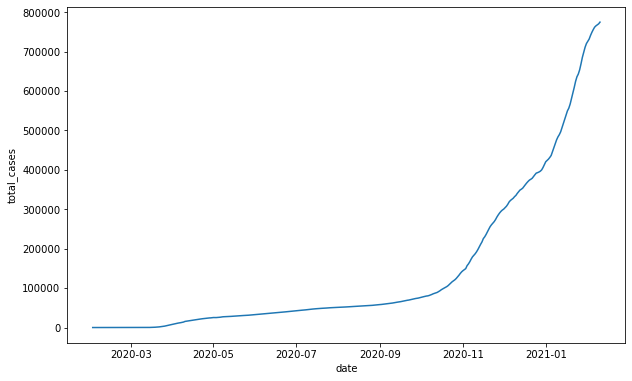

In [8]:
fig,ax = plt.subplots(figsize= (10,10*0.618))
lp = sns.lineplot(data = df_port, x="date", y="total_cases", ax=ax);

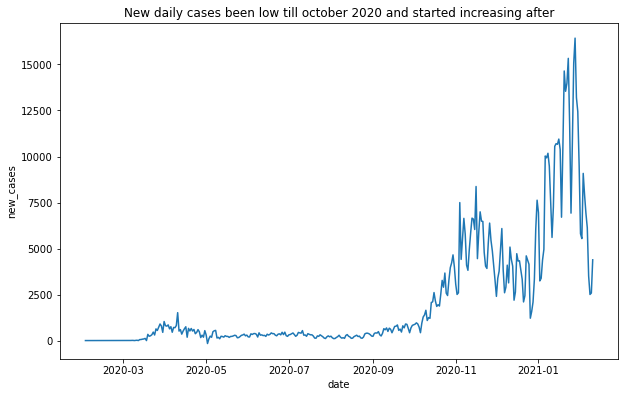

In [9]:
fig,ax = plt.subplots(figsize= (10,10*0.618))
lp = sns.lineplot(data = df_port, x="date", y="new_cases", ax=ax);
plt.title("New daily cases been low till october 2020 and started increasing after");
plt.savefig('foo.png')

In [10]:
df_port["new_cases_FD"] = df_port["new_cases"].diff(1)
df_port = df_port.fillna(0)

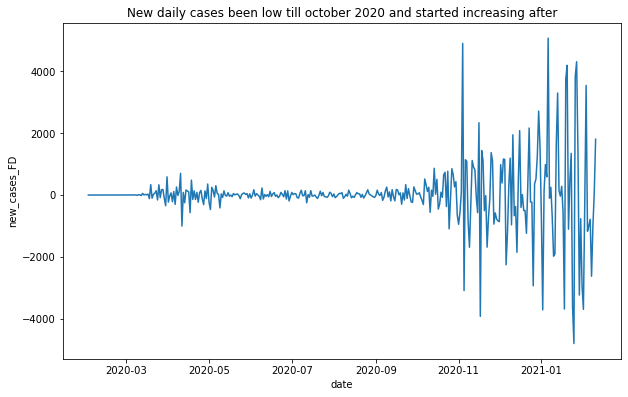

In [11]:
fig,ax = plt.subplots(figsize= (10,10*0.618))
lp = sns.lineplot(data = df_port, x="date", y="new_cases_FD", ax=ax);
plt.title("New daily cases been low till october 2020 and started increasing after");

In [12]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

In [13]:
print(adfuller(df_port["new_cases"]))

(-3.3589650958100545, 0.01243986880237536, 14, 336, {'1%': -3.449962981927952, '5%': -2.870180642420163, '10%': -2.5713734527352607}, 5389.489173123169)


In [14]:
print(adfuller(df_port["new_cases_FD"]))

(-4.37093579194228, 0.000334032416690295, 17, 333, {'1%': -3.450141065277327, '5%': -2.870258846235788, '10%': -2.571415151457764}, 5383.972224773338)


In [15]:
### Problem 1.2

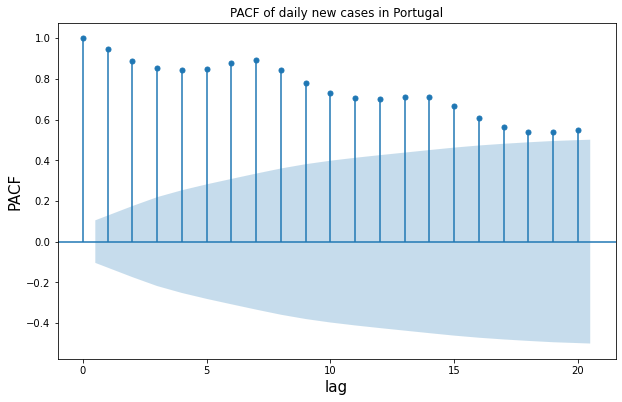

In [16]:
fig= tsaplots.plot_acf(df_port["new_cases"],lags=20, alpha=0.05);
plt.xlabel("lag",fontsize=15)
plt.ylabel("PACF" ,fontsize=15)
plt.title("PACF of daily new cases in Portugal")
fig.set_figwidth(10)
fig.set_figheight(10*0.618)
plt.savefig('PAutocorrelation_NC.png')

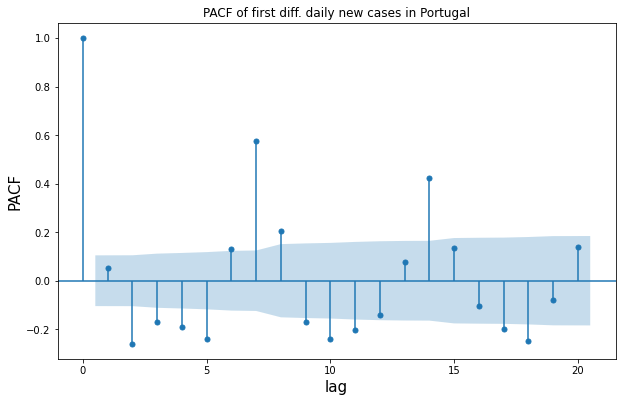

In [17]:
fig= tsaplots.plot_acf(df_port["new_cases_FD"],lags=20);
plt.xlabel("lag",fontsize=15)
plt.ylabel("PACF" ,fontsize=15)
plt.title("PACF of first diff. daily new cases in Portugal")
fig.set_figwidth(10)
fig.set_figheight(10*0.618)
plt.savefig('PAutocorrelation_NCFD.png')

In [18]:
# Problem 1.3

In [19]:
new_cases_FD_arima = auto_arima(df_port["new_cases_FD"], start_p = 0,d=0, start_q =0, max_d = 0, stationary = True,
                                max_p = 7, max_q = 7, seasonal = False, stepwise = False, trace = True)


 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=5883.287, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=5883.412, Time=0.12 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=5844.772, Time=0.05 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=5837.615, Time=0.18 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=5839.125, Time=0.23 sec
 ARIMA(0,0,5)(0,0,0)[0] intercept   : AIC=5787.355, Time=0.59 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=5884.342, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=5865.211, Time=0.18 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=5839.655, Time=0.33 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=5832.703, Time=0.40 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=5788.343, Time=0.46 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=5861.251, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=5832.057, Time=0.06 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=5769.508, Time=0.27 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=5759.883, Time=0.41 sec
 ARIMA(3,0

In [20]:
new_cases_FD_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  351
Model:               SARIMAX(2, 0, 3)   Log Likelihood               -2872.942
Date:                Mon, 06 Sep 2021   AIC                           5759.883
Time:                        19:08:39   BIC                           5786.909
Sample:                             0   HQIC                          5770.639
                                - 351                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.7638     13.106      0.363      0.716     -20.923      30.451
ar.L1          1.2274      0.035     35.352      0.000       1.159       1.295
ar.L2         -0.6505      0.032    -20.207      0.000      -0.714      -0.587
ma.L1         -1.4780      0.038    -39.304      0.000      -1.552      -1.404
ma.L2          0.4853      0.065      7.465      0.000       0.358       0.613
ma.L3          0.2620      0.035      7.470      0.000       0.193       0.331
sigma2      7.411e+05   2.83e+04     26.191      0.000    6.86e+05    7.97e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               804.48
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):              39.15   Skew:                            -0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
from statsmodels.tsa.arima.model import ARIMA

C:\Users\benja\.conda\envs\mlcourse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\benja\.conda\envs\mlcourse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\benja\.conda\envs\mlcourse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


                               SARIMAX Results                                
Dep. Variable:           new_cases_FD   No. Observations:                  351
Model:                 ARIMA(7, 0, 2)   Log Likelihood               -2827.792
Date:                Mon, 06 Sep 2021   AIC                           5677.584
Time:                        19:08:55   BIC                           5720.052
Sample:                             0   HQIC                          5694.486
                                - 351                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.4109     47.729      0.260      0.795     -81.137     105.959
ar.L1          0.4846      0.072      6.698      0.000       0.343       0.626
ar.L2         -0.4307      0.066     -6.536      0.0

C:\Users\benja\.conda\envs\mlcourse\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


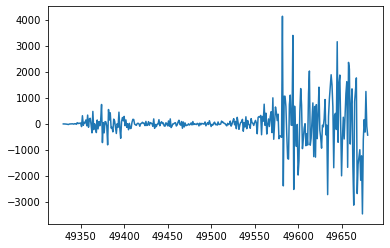

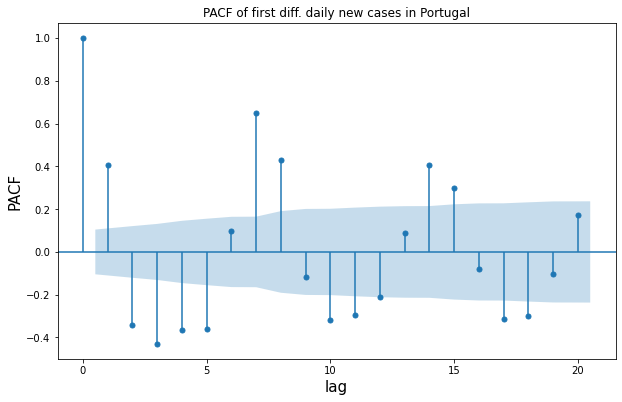

In [22]:
model = ARIMA(df_port["new_cases_FD"], order=(7,0,2))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = model_fit.resid
model_fit_fit = model_fit.fittedvalues
residuals.plot()
fig= tsaplots.plot_acf(model_fit_fit,lags=20);
plt.xlabel("lag",fontsize=15)
plt.ylabel("PACF" ,fontsize=15)
plt.title("PACF of first diff. daily new cases in Portugal")
fig.set_figwidth(10)
fig.set_figheight(10*0.618)
# density plot of residuals

In [23]:
#model = auto_arima(df_port["new_cases_FD"], start_p = 7,d=0, start_q =7, max_d = 0, stationary = True,
#                                max_p = 7, max_q = 7, seasonal = False, stepwise = False, trace = True)
model = ARIMA(df_port["new_cases_FD"], order=(7, 0, 7))
model_fit = model.fit()
results_as_html = model_fit.summary().tables[0].as_html()
tex_table = pd.read_html(results_as_html, header=0, index_col=0)[0]
print(tex_table.to_latex())

results_as_html = results.summary().tables[1].as_html()
tex_table = pd.read_html(results_as_html, header=0, index_col=0)[0]
print(tex_table.to_latex())

C:\Users\benja\.conda\envs\mlcourse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\benja\.conda\envs\mlcourse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\benja\.conda\envs\mlcourse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\benja\.conda\envs\mlcourse\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ImportError: lxml not found, please install it